### Subset the data

In [15]:
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [36]:
user = pd.read_csv('./data/raw/train_users_2.csv')
session = pd.read_csv('./data/raw/sessions.csv')

In [31]:
len(user.id.unique())

213451

In [32]:
len(session.user_id.unique())

135484

In [24]:
session_pool = list(session.user_id.unique())

In [26]:
user_no_session = user[~user['id'].isin(session_pool)]

In [34]:
user_with_session = user[user['id'].isin(session_pool)]

In [30]:
user_no_session.shape

(139636, 16)

In [35]:
user_with_session.shape

(73815, 16)

In [28]:
user_no_session.country_destination.value_counts()

NDF      79502
US       42281
other     6439
FR        3588
IT        1856
GB        1593
ES        1542
CA         988
DE         811
NL         515
AU         387
PT         134
Name: country_destination, dtype: int64

In [6]:
print (user.shape)
print (session.shape)

(213451, 16)
(10567737, 6)


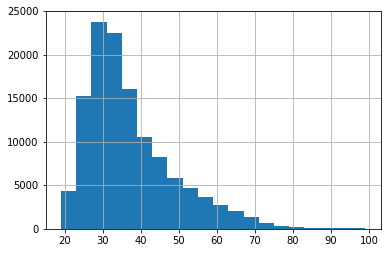

In [7]:
user[(~user['age'].isna()) & (user['age']>18) & (user['age']<100) ].age.hist(bins = 20)

In [9]:
random.seed(1234)
subset = random.sample(range(user.shape[0]), int(user.shape[0]*0.1))
user_subset = user.iloc[subset,:]
subset_id = set(user_subset['id'])
session['in_subset'] = session['user_id'].apply(lambda x:x in subset_id)
session_subset = session[session['in_subset']]
session_subset.drop(['in_subset'], axis=1, inplace=True)

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [10]:
print (user_subset.shape)
print (session_subset.shape)

(21345, 16)
(568626, 6)


In [11]:
session_subset.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
127,yo8nz8bqcq,dashboard,view,dashboard,Mac Desktop,2739.0
128,yo8nz8bqcq,create,submit,create_user,Mac Desktop,NaN
129,yo8nz8bqcq,confirm_email,click,confirm_email_link,Mac Desktop,115983.0
130,yo8nz8bqcq,show,view,p3,Mac Desktop,20285.0
131,yo8nz8bqcq,show_personalize,data,user_profile_content_update,Mac Desktop,3255.0


In [12]:
with open('./data/raw/user_subset.pkl', 'wb') as picklefile:
    pickle.dump(user_subset, picklefile)

In [13]:
with open('./data/raw/session_subset.pkl', 'wb') as picklefile:
    pickle.dump(session_subset, picklefile)

In [14]:
user_subset.to_csv('./data/raw/user_subset.csv', index=False)
session_subset.to_csv('./data/raw/session_subset.csv', index=False)